## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre: **Matias**
- Apellido: **Intraguglielmo**
- Legajo: **164.683-7**

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
## Importo el dataset para el posterior analisis
diabetes_df = pd.read_csv('dataset_diabetes.csv')
## Verifico que se haya cargado correctamente, imprimiendo las primeras filas del df
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
## Con .shape podemos ver el tamaño del dataframe por filas y columnas
diabetes_df.shape

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [4]:
## Con la sgte linea de codigo, observamos el tipo de dato y la cantidad de registros nulos, para cada una de nuestras variables
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

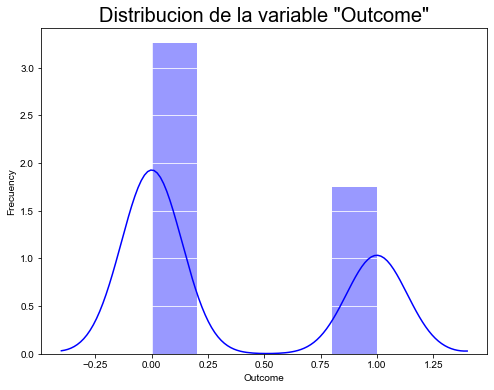

In [5]:
plt.figure(figsize=(8,6))
sns.distplot(diabetes_df.Outcome, color="blue")
plt.style.use('seaborn-darkgrid')
plt.rcParams['axes.facecolor'] = '#d9f5fc'
plt.grid(color='white',linestyle='solid')
plt.xlabel("Outcome")
plt.ylabel("Frecuency")
plt.title('Distribucion de la variable "Outcome"',size = 20)
plt.show()

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [6]:
## Con el sgte comando podemos visualizar algunos datos estadisticos que describen nuestras variables.
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

Text(0.5, 1.1, 'Pairplot')

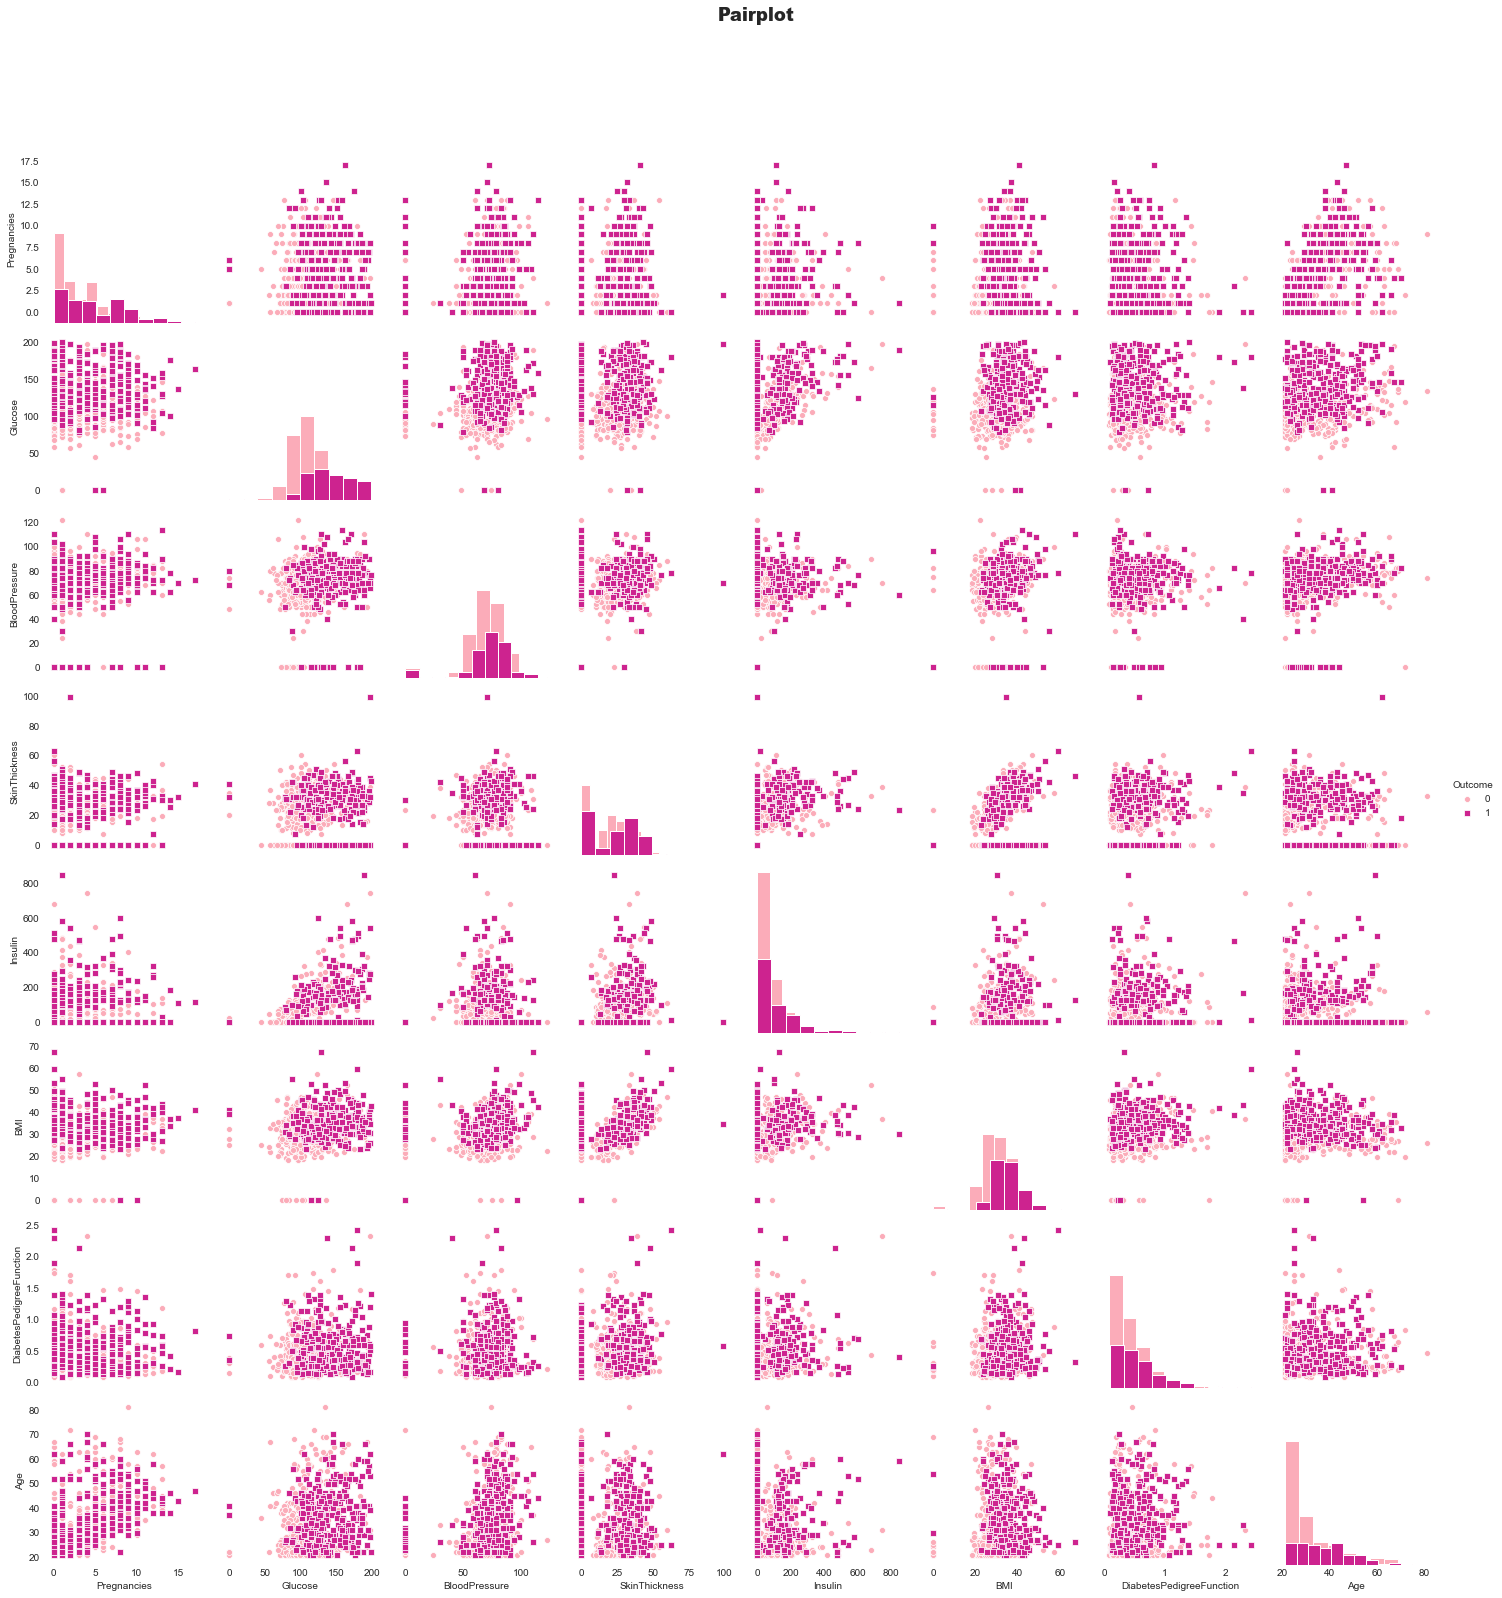

In [7]:
# Seteo de Tema
sns.set_style('white')
vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Creo el pairplot
pairplot=sns.pairplot(diabetes_df, hue='Outcome', diag_kind='hist', palette='RdPu', markers=['o','s'], 
                        vars=vars)

# Titulos
pairplot.fig.suptitle('Pairplot', fontweight = 'heavy', y=1.1, fontsize='18', 
                      fontfamily='sans-serif')

## Como primer conclusion a partir del pairplot, podemos decir que para muchas de las variables se observan outliers que registran como valor 0, pero puede ser porque no se analizo dicho reactivo.
## Otra conclusion es que la variable mas determinante a la hora de ver si un paciente es diabetico o no, es la glucosa. Un nivel alto de glucosa indica en la mayoria de los casos que el paciente es diabetico.

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

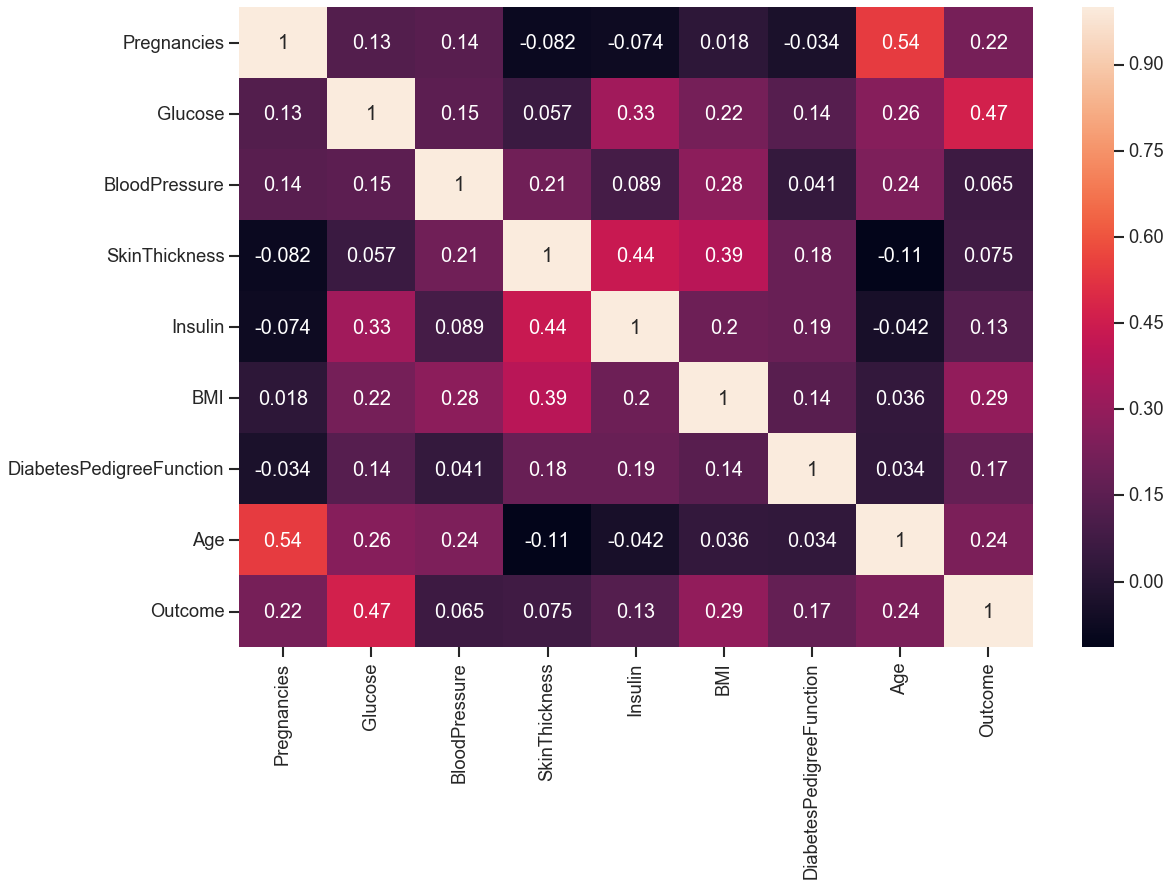

In [28]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(diabetes_df.corr(),annot=True)
sns.set(rc={'figure.figsize':(16,8)})
plt.show()

## El par que cuenta con una correlacion fuerte (positiva) es el de Embarazos y Edad.

##### **Objetivo 8**
Hacer un histograma de la variable BMI

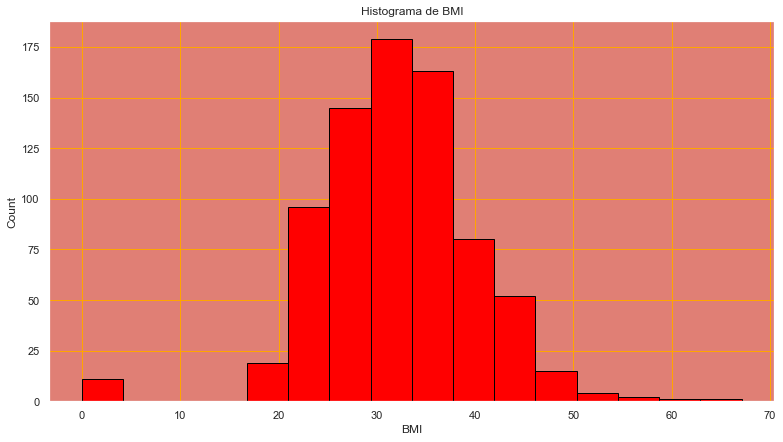

In [9]:
plt.figure(figsize=(13,7))
plt.style.use('seaborn-deep')
plt.rcParams['axes.facecolor'] = '#e07f75'
plt.grid(color='orange',linestyle='solid')
plt.title(f'Histograma de BMI')
plt.ylabel('Count')
plt.xlabel('BMI')
plt.hist(diabetes_df.BMI,bins=16,density=False,edgecolor='black',color='red')
plt.show()

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

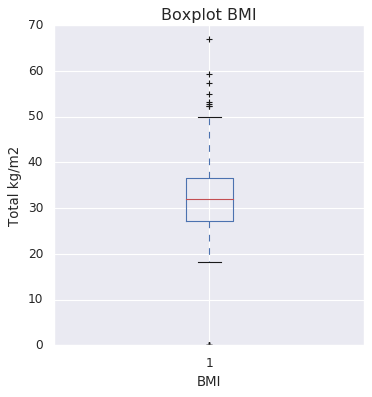

In [29]:
plt.subplots(figsize=(5,5))
plt.style.use('classic')
plt.rcParams['axes.facecolor'] = '#e1e9eb'
plt.grid(color='white',linestyle='solid')
plt.boxplot(diabetes_df['BMI'])
plt.title('Boxplot BMI')
plt.ylabel('Total kg/m2')
plt.xlabel("BMI")
plt.show()

# Notamos que hay pacientes con registros nulos para la variable BMI.
# Seguramente sean pacientes a los que no se les hizo el calculo del indice de masa corporal.

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

In [11]:
# Filtro df por variable BMI
list_vars = ["BMI"]
diabetes_df[list_vars].head(50)


,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
5,25.6
6,31.0
7,35.3
8,30.5
9,0.0


In [12]:
# Elimino los registros con valor 0 en la variable BMI.
diabetes_BMI= diabetes_df.loc[diabetes_df['BMI']!=0]
diabetes_BMI[list_vars].head(50)

,BMI
0,33.6
1,26.6
2,23.3
3,28.1
4,43.1
5,25.6
6,31.0
7,35.3
8,30.5
10,37.6


##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

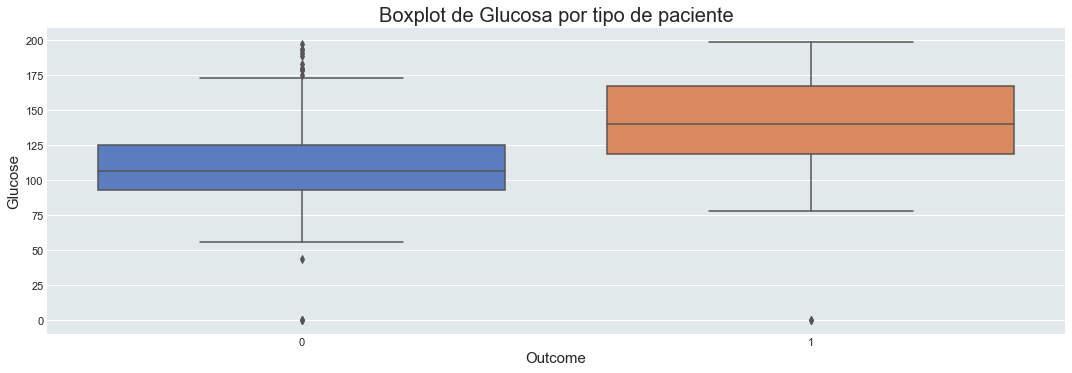

In [13]:
g = sns.catplot(data=diabetes_df,
                x="Outcome",y="Glucose", 
                kind="box",
                palette = "muted",
                height = 5 ,aspect=3)
plt.xlabel("Outcome",size = 15)
plt.ylabel("Glucose",size = 15)
plt.title('Boxplot de Glucosa por tipo de paciente',size = 20)
plt.show()

## Se observa mediante el siguiente grafico, que los pacientes diabeticos tienen un nivel de glucosa mayor.

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

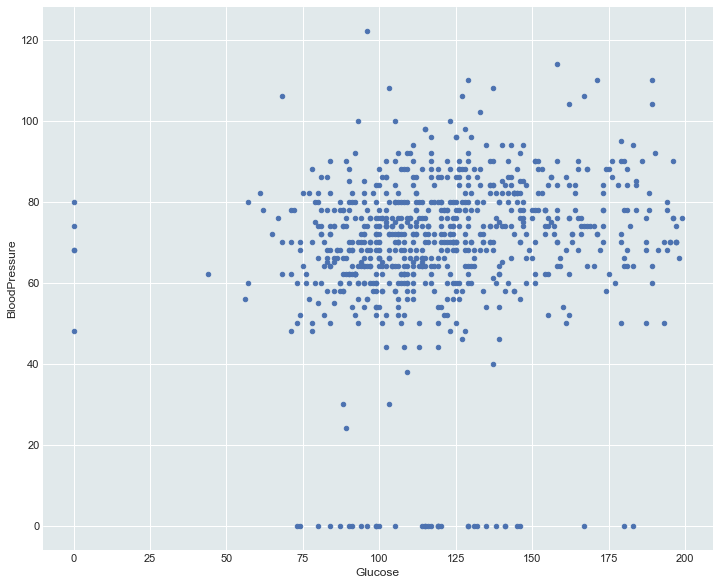

In [14]:
diabetes_df.plot(kind="scatter", x="Glucose", y="BloodPressure")

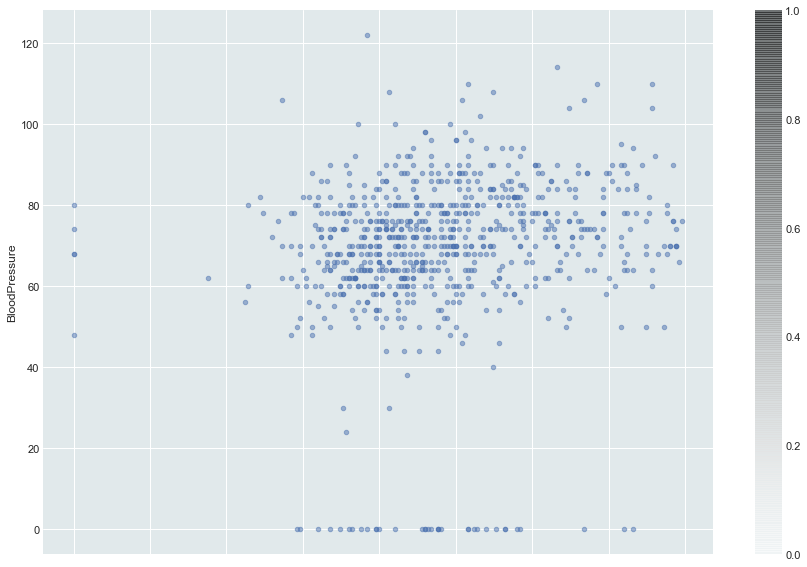

In [15]:
# *prueba* Podemos aplicar tambien algunas funciones de plot sobre el dataframe usando pd.plot( )
diabetes_df.plot(kind="scatter", x="Glucose", y="BloodPressure",
        cmap=plt.get_cmap(), colorbar=True, alpha=0.5, figsize=(15,10))
plt.show()

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [16]:
# Defino los limites para cada una de las categorias, y creo la columna "Rango Etario"

diabetes_df.loc[(diabetes_df['Age'] > 0) & (diabetes_df['Age'] <= 30), 'RangoEtario'] = 'Menor a 30'
diabetes_df.loc[(diabetes_df['Age'] > 30) & (diabetes_df['Age'] <= 40), 'RangoEtario']   = 'Entre 30 y 40'
diabetes_df.loc[(diabetes_df['Age'] > 40) & (diabetes_df['Age'] <= 100), 'RangoEtario']   = 'Mayor a 40'

In [17]:
# Chequeo si se creo la columna nueva
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoEtario
0,6,148,72,35,0,33.6,0.627,50,1,Mayor a 40
1,1,85,66,29,0,26.6,0.351,31,0,Entre 30 y 40
2,8,183,64,0,0,23.3,0.672,32,1,Entre 30 y 40
3,1,89,66,23,94,28.1,0.167,21,0,Menor a 30
4,0,137,40,35,168,43.1,2.288,33,1,Entre 30 y 40
5,5,116,74,0,0,25.6,0.201,30,0,Menor a 30
6,3,78,50,32,88,31.0,0.248,26,1,Menor a 30
7,10,115,0,0,0,35.3,0.134,29,0,Menor a 30
8,2,197,70,45,543,30.5,0.158,53,1,Mayor a 40
9,8,125,96,0,0,0.0,0.232,54,1,Mayor a 40


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

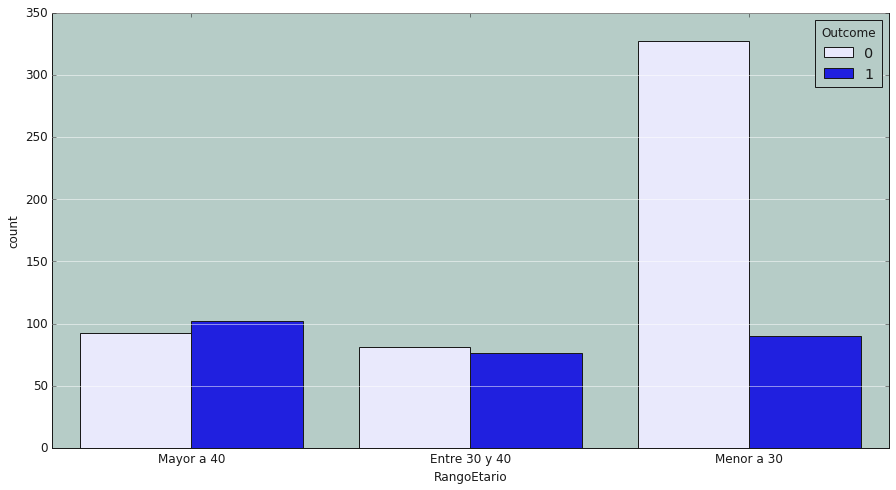

In [18]:
plt.figure(figsize=(15,8))
plt.style.use('classic')
plt.rcParams['axes.facecolor'] = '#b6ccc7'
plt.grid(color='white',linestyle='solid')
sns.countplot(hue='Outcome', x ='RangoEtario', data = diabetes_df, color="blue")

plt.show()


## Podemos hacer una conclusion rapida de que entre menores de 30 años es mas dificil encontrar una persona diabetica, quizas se debe a que el diabetes tipo 2 se da con mayor frecuencia en personas de mediana edad y adultos mayores. Pero hay que analizarlo mas en profundidad.